# FAQ 데이터 분석

## 임포트 및 폰트 설정

In [1]:
import pickle
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 한글 폰트 설정
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

## 데이터 로드

In [3]:
def load_faq_data(file_path="../data/final_result.pkl"):
    with open(file_path, "rb") as f:
        data = pickle.load(f)
    # dict를 리스트로 변환: [{'question': str, 'answer': str}]
    faq_list = [{"question": k, "answer": v} for k, v in data.items()]
    return faq_list


faq_data = load_faq_data()
print(f"총 FAQ 수: {len(faq_data)}")

총 FAQ 수: 2717


In [4]:
print("샘플 데이터:", faq_data[0])

샘플 데이터: {'question': '[가입절차] 스마트스토어센터 회원가입은 어떻게 하나요? (ID만들기)', 'answer': '네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 편리하게 이용하실 수 있습니다.네이버 커머스 ID가 없으시다면 [가입하기] 버튼을 통해 회원가입해 주세요.\xa0\xa0 \xa0 \xa0 \xa0 \xa0\xa01. \'네이버ID\' 로 네이버 커머스 ID 가입하기1) [네이버 아이디로 가입하기] 버튼을 눌러서 네이버 로그인 해 주세요.2) 연락가능한 휴대폰번호를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요.\xa03) 네이버 커머스 ID 회원가입이 완료되어 해당 네이버ID 로 스마트스토어센터 서비스 가입을 하실 수 있습니다.\xa0이 후 스마트스토어센터 로그인 시에 [네이버 아이디로 로그인] 버튼을 눌러서 네이버 로그인을 하실 수 있습니다.\xa02. \'이메일 아이디\'로 네이버 커머스 ID 가입하기\xa01) [이메일 아이디로 가입하기] 버튼을 눌러서 사용할 ID를 입력해 주세요.! 중요. 로그인 ID는 "실 사용중인 이메일주소"로 기재하셔야 합니다. (예 : abc@naver.com)2) 연락가능한 휴대폰번호와 이메일주소를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요.3) 네이버 커머스 ID 회원가입이 완료되어 해당 이메일 아이디로 스마트스토어센터 서비스 가입을 하실 수 있습니다.이 후 스마트스토어센터 로그인 시에 해당 이메일 아이디와 비밀번호를 입력하여 로그인을 하실 수 있습니다.\xa0※ 참고. 로그인 ID 계정 대표자와 사업자번호 대표자 동일여부는 체크하지 않습니다. (대표자가 상이해도 가입 진행 가능합니다.)\xa0 \xa0\xa0 \xa0 \xa0 \xa0 \xa0\xa0\n\n\n위 도움말이 도움이 되었나요?\n\n\n별점1점\n\n별점2점\n\n별점3점\n\n별점4점\n\n별점5점\n\n\n\n소중한 의견을

## 데이터 정보 및 결측치 확인

In [5]:
df = pd.DataFrame(faq_data)
print(df.info())
print("\n결측치 수:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  2717 non-null   object
 1   answer    2717 non-null   object
dtypes: object(2)
memory usage: 42.6+ KB
None

결측치 수:
question    0
answer      0
dtype: int64


## 중복 질문 확인

In [6]:
# 중복 질문
duplicate_questions = df[df["question"].duplicated()]["question"]
print(f"중복 질문 수: {len(duplicate_questions)}")
if len(duplicate_questions) > 0:
    print("중복 질문 예시:", duplicate_questions[:5].tolist())

중복 질문 수: 0


## 단어 및 글자 수 확인

In [7]:
question_length_words = df["question"].apply(lambda x: len(str(x).split()))
answer_length_words = df["answer"].apply(lambda x: len(str(x).split()))
question_length_chars = df["question"].apply(len)
answer_length_chars = df["answer"].apply(len)

print("question 길이(단어) 통계:")
print(question_length_words.describe())
print("\nanswer 길이(단어) 통계:")
print(answer_length_words.describe())
print("\nquestion 길이(글자) 통계:")
print(question_length_chars.describe())
print("\nanswer 길이(글자) 통계:")
print(answer_length_chars.describe())

question 길이(단어) 통계:
count    2717.000000
mean        7.757085
std         2.966410
min         2.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        21.000000
Name: question, dtype: float64

answer 길이(단어) 통계:
count    2717.000000
mean      103.531837
std       111.616336
min        21.000000
25%        48.000000
50%        72.000000
75%       117.000000
max      2063.000000
Name: answer, dtype: float64

question 길이(글자) 통계:
count    2717.000000
mean       36.045271
std        12.968743
min         8.000000
25%        27.000000
50%        34.000000
75%        44.000000
max        92.000000
Name: question, dtype: float64

answer 길이(글자) 통계:
count    2717.000000
mean      501.685315
std       546.043168
min       113.000000
25%       241.000000
50%       350.000000
75%       564.000000
max      9094.000000
Name: answer, dtype: float64


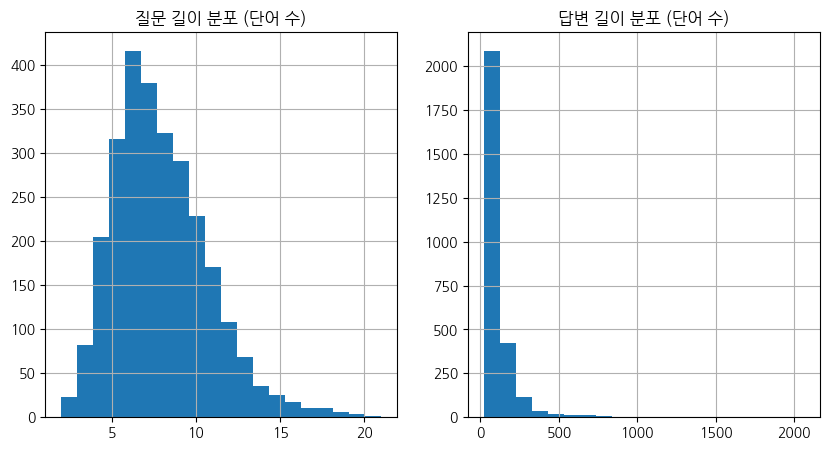

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
question_length_words.hist(bins=20)
plt.title("질문 길이 분포 (단어 수)")
plt.subplot(1, 2, 2)
answer_length_words.hist(bins=20)
plt.title("답변 길이 분포 (단어 수)")
plt.show()

### 이상치 확인

In [9]:
# 이상치 필터링
length = 1000
outliers = df[answer_length_words >= length]
print(f"답변 길이 {length} 이상 FAQ 수: {len(outliers)}")
print("\n이상치 FAQ 상세:")
for idx, row in outliers.iterrows():
    print(f"\nIndex: {idx}")
    print(f"질문: {row['question']}")
    print(f"답변 길이: {row.apply(lambda x: len(str(x).split()))} 단어")
    print(f"답변: {row['answer']}...")

답변 길이 1000 이상 FAQ 수: 5

이상치 FAQ 상세:

Index: 1838
질문: 마케팅채널 분류를 알고 싶어요.
답변 길이: question       4
answer      1042
Name: 1838, dtype: int64 단어
답변: Biz Advisor에서는 아래와 같이 마케팅 채널들을 분류하여 제공하고 있습니다.(참고로 유입 검색어/키워드별 유입은 [마케팅분석 > 검색채널]리포트에서 확인 할 수 있습니다.)

채널속성L1_채널그룹L2_채널명L3_채널상세PC/M검색바이두검색(-)빙검색(-)다음검색(-)구글검색(-)카카오검색(-)네이트검색(-)네이버검색(-)줌검색(-)검색광고네이버 사이트검색광고(-)네이버 쇼핑검색광고(-)네이버 브랜드검색(일반형)(-)네이버 브랜드검색(브랜드존형)(-)네이버 클릭초이스플러스(-)네이버 클릭초이스상품광고(-)네이버 신제품검색(-)네이버 서칭뷰(-)네이버 플레이스광고(-)구글 검색광고(-)다음 검색광고(-)네오클릭광고(-)광고유튜브광고(구글 동영상광고)(-)네이버 성과형디스플레이광고(-)네이버 보장형디스플레이광고(-)네이버 보장형디스플레이광고모바일메인 헤드라인DA네이버 보장형디스플레이광고모바일메인 스페셜DA네이버 보장형디스플레이광고모바일메인 브랜딩DA네이버 보장형디스플레이광고모바일메인 스마트채널네이버 보장형디스플레이광고모바일메인
  연예FirstView네이버 보장형디스플레이광고모바일서브광고네이버 보장형디스플레이광고모바일서브 연예하단네이버 보장형디스플레이광고PC메인 롤링보드네이버 보장형디스플레이광고PC메인 타임보드네이버 보장형디스플레이광고PC서브광고네이버 보장형디스플레이광고네이버TV 동영상광고네이버 보장형디스플레이광고네이버스포츠 동영상광고네이버 보장형디스플레이광고웹툰광고네이버 보장형디스플레이광고스노우광고네이버 보장형디스플레이광고모바일메인 쇼핑라이브네이버 보장형디스플레이광고모바일메인 풀스크린네이버 보장형디스플레이광고모바일메인 쇼케이스네이버 보장형디스플레이광고모바일메인 풀스크린스마트채널네이버 보장형디스플레이광고P

## 질문 [카테고리] 분리

In [10]:
# 카테고리 추출 함수
def extract_category(question: str) -> tuple:
    category = re.match(r"\[(.*?)\]", question)
    category = category.group(1) if category else ""
    question = re.sub(r"\[.*?\]", "", question).strip()
    return category, question


# 카테고리 분리
df[["category", "question"]] = df["question"].apply(lambda x: pd.Series(extract_category(x)))

# 개수 및 분포 분석
category_counts = df["category"].value_counts()

print(f"총 카테고리 수: {len(category_counts)}")
print(f"카테고리 없는 질문 수: {(df['category'] == '').sum()}")
print("\n상위 5개 카테고리 분포:")
print(category_counts.head(6))

총 카테고리 수: 106
카테고리 없는 질문 수: 1286

상위 5개 카테고리 분포:
category
             1286
스마트스토어         81
풀필먼트           80
커머스솔루션         62
원쁠딜            56
쇼핑라이브 숏클립      56
Name: count, dtype: int64


## 답변에서 관련 질문 추출

In [11]:
def extract_related_questions(answer: str) -> list:
    match = re.search(r"관련 도움말/키워드([\s\S]*?)도움말 닫기", answer)
    if match:
        return [line.strip() for line in match.group(1).split("\n") if line.strip()]
    return []


df["related_questions"] = df["answer"].apply(extract_related_questions)
len_rq = df["related_questions"].apply(len) > 0
print(f"관련 질문 포함 FAQ 비율: {len_rq.mean():.2%}, 개수: {len_rq.sum()}")
print("샘플 질문:", df["related_questions"].iloc[0])

관련 질문 포함 FAQ 비율: 12.55%, 개수: 341
샘플 질문: ['스마트스토어 로그인ID(매니저)를 추가하거나 변경할 수 없나요?', '네이버 커머스 ID 전환 이후, 이전 아이디로 로그인이 불가한가요?', '네이버 커머스 ID 전환 후 로그인이 되지 않아요.']


## 답변 불필요 텍스트 제거

In [12]:
def answer_meta(answer: str) -> str:
    """답변에서 '위 도움말이 도움이 되었나요?' 이후 제거"""
    clean_text = re.split(r"위 도움말이 도움이 되었나요\?", answer)[0].strip()
    return clean_text


df["answer"] = df["answer"].apply(answer_meta)
print(df["answer"].iloc[0])

네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 편리하게 이용하실 수 있습니다.네이버 커머스 ID가 없으시다면 [가입하기] 버튼을 통해 회원가입해 주세요.           1. '네이버ID' 로 네이버 커머스 ID 가입하기1) [네이버 아이디로 가입하기] 버튼을 눌러서 네이버 로그인 해 주세요.2) 연락가능한 휴대폰번호를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요. 3) 네이버 커머스 ID 회원가입이 완료되어 해당 네이버ID 로 스마트스토어센터 서비스 가입을 하실 수 있습니다. 이 후 스마트스토어센터 로그인 시에 [네이버 아이디로 로그인] 버튼을 눌러서 네이버 로그인을 하실 수 있습니다. 2. '이메일 아이디'로 네이버 커머스 ID 가입하기 1) [이메일 아이디로 가입하기] 버튼을 눌러서 사용할 ID를 입력해 주세요.! 중요. 로그인 ID는 "실 사용중인 이메일주소"로 기재하셔야 합니다. (예 : abc@naver.com)2) 연락가능한 휴대폰번호와 이메일주소를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요.3) 네이버 커머스 ID 회원가입이 완료되어 해당 이메일 아이디로 스마트스토어센터 서비스 가입을 하실 수 있습니다.이 후 스마트스토어센터 로그인 시에 해당 이메일 아이디와 비밀번호를 입력하여 로그인을 하실 수 있습니다. ※ 참고. 로그인 ID 계정 대표자와 사업자번호 대표자 동일여부는 체크하지 않습니다. (대표자가 상이해도 가입 진행 가능합니다.)


## 특수문자 확인

In [13]:
df["answer"][0]

'네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 편리하게 이용하실 수 있습니다.네이버 커머스 ID가 없으시다면 [가입하기] 버튼을 통해 회원가입해 주세요.\xa0\xa0 \xa0 \xa0 \xa0 \xa0\xa01. \'네이버ID\' 로 네이버 커머스 ID 가입하기1) [네이버 아이디로 가입하기] 버튼을 눌러서 네이버 로그인 해 주세요.2) 연락가능한 휴대폰번호를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요.\xa03) 네이버 커머스 ID 회원가입이 완료되어 해당 네이버ID 로 스마트스토어센터 서비스 가입을 하실 수 있습니다.\xa0이 후 스마트스토어센터 로그인 시에 [네이버 아이디로 로그인] 버튼을 눌러서 네이버 로그인을 하실 수 있습니다.\xa02. \'이메일 아이디\'로 네이버 커머스 ID 가입하기\xa01) [이메일 아이디로 가입하기] 버튼을 눌러서 사용할 ID를 입력해 주세요.! 중요. 로그인 ID는 "실 사용중인 이메일주소"로 기재하셔야 합니다. (예 : abc@naver.com)2) 연락가능한 휴대폰번호와 이메일주소를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요.3) 네이버 커머스 ID 회원가입이 완료되어 해당 이메일 아이디로 스마트스토어센터 서비스 가입을 하실 수 있습니다.이 후 스마트스토어센터 로그인 시에 해당 이메일 아이디와 비밀번호를 입력하여 로그인을 하실 수 있습니다.\xa0※ 참고. 로그인 ID 계정 대표자와 사업자번호 대표자 동일여부는 체크하지 않습니다. (대표자가 상이해도 가입 진행 가능합니다.)'

In [14]:
# 특수문자 추출 함수
def extract_special_chars(text: str) -> list:
    # 영숫자, 한글, 공백 제외
    pattern = r"[^\w\s\uAC00-\uD7A3]"
    return re.findall(pattern, text)


# 질문과 답변에서 특수문자 분석
df["question_special_chars"] = df["question"].apply(extract_special_chars)
df["answer_special_chars"] = df["answer"].apply(extract_special_chars)

# 특수문자 종류 및 개수
question_special_counts = Counter([char for chars in df["question_special_chars"] for char in chars])
answer_special_counts = Counter([char for chars in df["answer_special_chars"] for char in chars])

# 특수문자 포함 비율
question_special_ratio = (df["question_special_chars"].apply(len) > 0).mean()
answer_special_ratio = (df["answer_special_chars"].apply(len) > 0).mean()

print(f"\n질문 내 특수문자 포함 비율: {question_special_ratio:.2%}")
print(f"답변 내 특수문자 포함 비율: {answer_special_ratio:.2%}")

print("\n질문 특수문자 종류 및 개수:")
for char, count in question_special_counts.most_common():
    print(f"문자: {repr(char)}, 개수: {count}")

print("\n답변 특수문자 종류 및 개수:")
for char, count in answer_special_counts.most_common():
    print(f"문자: {repr(char)}, 개수: {count}")


질문 내 특수문자 포함 비율: 96.25%
답변 내 특수문자 포함 비율: 100.00%

질문 특수문자 종류 및 개수:
문자: '?', 개수: 2149
문자: "'", 개수: 730
문자: '.', 개수: 721
문자: ',', 개수: 291
문자: '(', 개수: 286
문자: ')', 개수: 286
문자: '/', 개수: 212
문자: '"', 개수: 74
문자: '★', 개수: 44
문자: '+', 개수: 18
문자: '>', 개수: 15
문자: '%', 개수: 10
문자: '’', 개수: 6
문자: '\u200b', 개수: 5
문자: '-', 개수: 5
문자: '‘', 개수: 4
문자: '&', 개수: 3
문자: '!', 개수: 2
문자: '↔', 개수: 2
문자: '~', 개수: 2
문자: '@', 개수: 2
문자: '·', 개수: 1
문자: '→', 개수: 1
문자: '=', 개수: 1
문자: '“', 개수: 1
문자: ':', 개수: 1

답변 특수문자 종류 및 개수:
문자: '.', 개수: 18121
문자: ',', 개수: 9724
문자: "'", 개수: 7964
문자: ')', 개수: 6735
문자: '(', 개수: 5448
문자: '/', 개수: 4065
문자: '·', 개수: 3605
문자: '>', 개수: 2859
문자: ']', 개수: 2621
문자: '[', 개수: 2619
문자: ':', 개수: 2098
문자: '※', 개수: 1471
문자: '-', 개수: 1458
문자: '"', 개수: 987
문자: '》', 개수: 668
문자: '+', 개수: 652
문자: '~', 개수: 542
문자: '\u200b', 개수: 513
문자: '%', 개수: 408
문자: '!', 개수: 334
문자: '?', 개수: 312
문자: '=', 개수: 223
문자: '■', 개수: 189
문자: '‘', 개수: 182
문자: '&', 개수: 180
문자: '’', 개수: 180
문자: '→', 개수: 147
문자: '☞', 개수: 128
문자: 

In [15]:
# 샘플 데이터 (특수문자 포함 질문/답변)
print("\n특수문자 포함 질문 샘플 (최대 5개):")
for idx, row in (
    df[df["question_special_chars"].apply(len) > 0][["question", "question_special_chars"]].head().iterrows()
):
    print(f"질문: {row['question']}\n특수문자: {set(row['question_special_chars'])}")

print("\n특수문자 포함 답변 샘플 (최대 5개):")
for idx, row in df[df["answer_special_chars"].apply(len) > 0][["answer", "answer_special_chars"]].head().iterrows():
    print(f"답변: {row['answer']}\n특수문자: {set(row['answer_special_chars'])}")

df = df.drop(columns=["question_special_chars", "answer_special_chars"])


특수문자 포함 질문 샘플 (최대 5개):
질문: 스마트스토어센터 회원가입은 어떻게 하나요? (ID만들기)
특수문자: {'(', '?', ')'}
질문: 스마트스토어 판매자 유형별 필요한 서류가 어떻게 되나요?
특수문자: {'?'}
질문: 가입 신청을 했습니다. 심사 결과는 어떻게 확인하나요?
특수문자: {'?', '.'}
질문: 네이버 쇼핑윈도 노출 절차는 어떻게 되나요?
특수문자: {'?'}
질문: 국내 사업자로 가입하려면 어떤 서류가 필요한가요?
특수문자: {'?'}

특수문자 포함 답변 샘플 (최대 5개):
답변: 네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 편리하게 이용하실 수 있습니다.네이버 커머스 ID가 없으시다면 [가입하기] 버튼을 통해 회원가입해 주세요.           1. '네이버ID' 로 네이버 커머스 ID 가입하기1) [네이버 아이디로 가입하기] 버튼을 눌러서 네이버 로그인 해 주세요.2) 연락가능한 휴대폰번호를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요. 3) 네이버 커머스 ID 회원가입이 완료되어 해당 네이버ID 로 스마트스토어센터 서비스 가입을 하실 수 있습니다. 이 후 스마트스토어센터 로그인 시에 [네이버 아이디로 로그인] 버튼을 눌러서 네이버 로그인을 하실 수 있습니다. 2. '이메일 아이디'로 네이버 커머스 ID 가입하기 1) [이메일 아이디로 가입하기] 버튼을 눌러서 사용할 ID를 입력해 주세요.! 중요. 로그인 ID는 "실 사용중인 이메일주소"로 기재하셔야 합니다. (예 : abc@naver.com)2) 연락가능한 휴대폰번호와 이메일주소를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요.3) 네이버 커머스 ID 회원가입이 완료되어 해당 이메일 아이디로 스마트스토어센터 서비스 가입을 하실 수 있습니다.이 후 스마트스토어센터 로그인 시에 해당 이메일 아이디와 비밀번호를 입력하여 로그인을 하실 수 있습니다. ※ 참고. 로

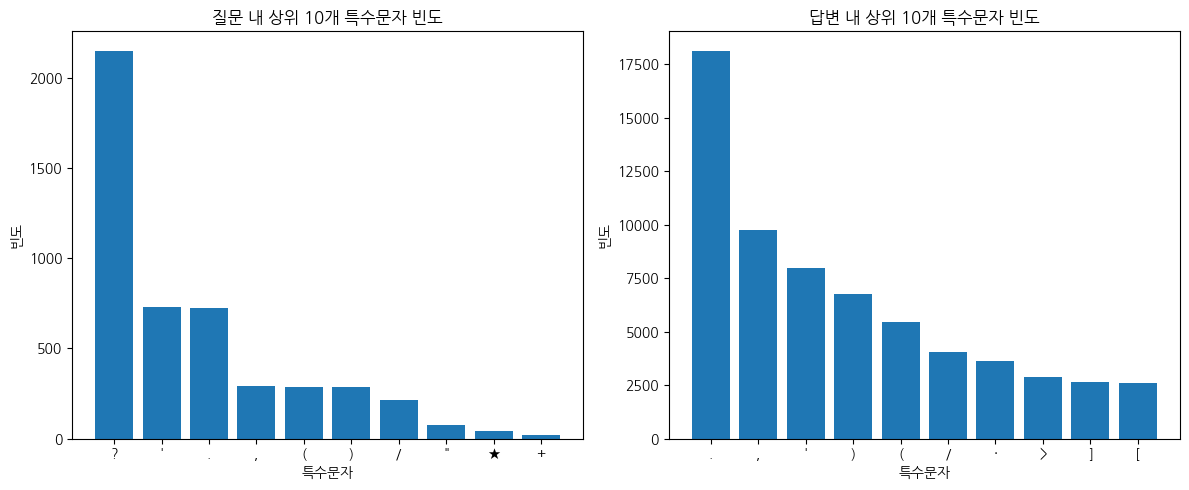

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
question_top_chars = dict(question_special_counts.most_common(10))
plt.bar(question_top_chars.keys(), question_top_chars.values())
plt.title("질문 내 상위 10개 특수문자 빈도")
plt.xlabel("특수문자")
plt.ylabel("빈도")

plt.subplot(1, 2, 2)
answer_top_chars = dict(answer_special_counts.most_common(10))
plt.bar(answer_top_chars.keys(), answer_top_chars.values())
plt.title("답변 내 상위 10개 특수문자 빈도")
plt.xlabel("특수문자")
plt.ylabel("빈도")

plt.tight_layout()
plt.show()

### '\xa0', '\u200b', '\ufeff' 제거

In [17]:
print(f"\\xa0 포함 답변: {(df['answer'].str.contains('\xa0', na=False)).sum()}")
print(f"\\u200b 포함 답변: {(df['answer'].str.contains('\u200b', na=False)).sum()}")
print(f"\\ufeff 포함 답변: {(df['answer'].str.contains('\ufeff', na=False)).sum()}")

\xa0 포함 답변: 2008
\u200b 포함 답변: 227
\ufeff 포함 답변: 90


In [18]:
def answer_uni(answer: str) -> str:
    # 특수 문자, 다중 공백 정제
    clean_text = re.sub(r"\xa0|\u200b|\ufeff", " ", answer).strip()
    clean_text = re.sub(r"\s+", " ", clean_text).strip()
    return clean_text


df["answer"] = df["answer"].apply(answer_uni)
print(df["answer"].iloc[0])

네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 편리하게 이용하실 수 있습니다.네이버 커머스 ID가 없으시다면 [가입하기] 버튼을 통해 회원가입해 주세요. 1. '네이버ID' 로 네이버 커머스 ID 가입하기1) [네이버 아이디로 가입하기] 버튼을 눌러서 네이버 로그인 해 주세요.2) 연락가능한 휴대폰번호를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요. 3) 네이버 커머스 ID 회원가입이 완료되어 해당 네이버ID 로 스마트스토어센터 서비스 가입을 하실 수 있습니다. 이 후 스마트스토어센터 로그인 시에 [네이버 아이디로 로그인] 버튼을 눌러서 네이버 로그인을 하실 수 있습니다. 2. '이메일 아이디'로 네이버 커머스 ID 가입하기 1) [이메일 아이디로 가입하기] 버튼을 눌러서 사용할 ID를 입력해 주세요.! 중요. 로그인 ID는 "실 사용중인 이메일주소"로 기재하셔야 합니다. (예 : abc@naver.com)2) 연락가능한 휴대폰번호와 이메일주소를 입력하시고 인증하신 후 개인정보 수집동의를 체크 하여 [가입] 버튼을 눌러주세요.3) 네이버 커머스 ID 회원가입이 완료되어 해당 이메일 아이디로 스마트스토어센터 서비스 가입을 하실 수 있습니다.이 후 스마트스토어센터 로그인 시에 해당 이메일 아이디와 비밀번호를 입력하여 로그인을 하실 수 있습니다. ※ 참고. 로그인 ID 계정 대표자와 사업자번호 대표자 동일여부는 체크하지 않습니다. (대표자가 상이해도 가입 진행 가능합니다.)


In [19]:
print(f"\\xa0 포함 답변: {(df['answer'].str.contains('\xa0', na=False)).sum()}")
print(f"\\u200b 포함 답변: {(df['answer'].str.contains('\u200b', na=False)).sum()}")
print(f"\\ufeff 포함 답변: {(df['answer'].str.contains('\ufeff', na=False)).sum()}")

\xa0 포함 답변: 0
\u200b 포함 답변: 0
\ufeff 포함 답변: 0


## 결과 확인 및 저장

In [20]:
df.head()

,question,answer,category,related_questions
0,스마트스토어센터 회원가입은 어떻게 하나요? (ID만들기),네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 ...,가입절차,"[스마트스토어 로그인ID(매니저)를 추가하거나 변경할 수 없나요?, 네이버 커머스 ..."
1,스마트스토어 판매자 유형별 필요한 서류가 어떻게 되나요?,스마트스토어 판매 회원 분류는 아래와 같으며 반드시 모든 서류를 제출해 주셔야 가입...,가입서류,[[고객확인제도] 고객확인제도(AML) 정보 등록 시 어떤 서류를 제출해야 하나요?]
2,가입 신청을 했습니다. 심사 결과는 어떻게 확인하나요?,"스마트스토어센터에 로그인하시면 ""팝업"" 또는 [판매자 정보 > 심사내역 조회] 메뉴...",심사결과,[]
3,네이버 쇼핑윈도 노출 절차는 어떻게 되나요?,"네이버 쇼핑 윈도에 입점하기 위해서는, [노출관리 > 쇼핑윈도 노출제안] 을 통해 ...",가입절차,[]
4,국내 사업자로 가입하려면 어떤 서류가 필요한가요?,국내 간이/개인(일반)/법인 사업자'로 가입하기 위해서는 아래의 서류를 사전에 준비...,가입서류,[]


### 기존 단어 길이

In [21]:
print("question 길이(단어) 통계:")
print(question_length_words.describe())
print("\nanswer 길이(단어) 통계:")
print(answer_length_words.describe())

question 길이(단어) 통계:
count    2717.000000
mean        7.757085
std         2.966410
min         2.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        21.000000
Name: question, dtype: float64

answer 길이(단어) 통계:
count    2717.000000
mean      103.531837
std       111.616336
min        21.000000
25%        48.000000
50%        72.000000
75%       117.000000
max      2063.000000
Name: answer, dtype: float64


### 전처리 후 단어 길이

In [22]:
question_length_words = df["question"].apply(lambda x: len(str(x).split()))
answer_length_words = df["answer"].apply(lambda x: len(str(x).split()))
question_length_chars = df["question"].apply(len)
answer_length_chars = df["answer"].apply(len)

print("question 길이(단어) 통계:")
print(question_length_words.describe())
print("\nanswer 길이(단어) 통계:")
print(answer_length_words.describe())

question 길이(단어) 통계:
count    2717.000000
mean        6.846154
std         2.692219
min         2.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        20.000000
Name: question, dtype: float64

answer 길이(단어) 통계:
count    2717.000000
mean       84.768127
std       110.573475
min         4.000000
25%        31.000000
50%        54.000000
75%        98.000000
max      2046.000000
Name: answer, dtype: float64


### 데이터 저장

In [23]:
df.to_pickle("../data/cleaned_result.pkl")